In [3]:
                                          # gfs         nam
# Colima Sodar  18.966187 -103.86911     20,30       d1 13,13 d3: 5,5
# Art. Guilles  19.28     -103.70        40,40

19.4 -103.6


In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
dataset = Dataset('../../../../exp_201303_sodar/gfs_les_d1_2013-03-01.nc')
print (dataset.file_format)
print (dataset.dimensions.keys())
#print (dataset.variables.keys())

NETCDF3_64BIT_OFFSET
odict_keys(['Time', 'DateStrLen', 'west_east', 'south_north', 'bottom_top', 'bottom_top_stag', 'soil_layers_stag', 'west_east_stag', 'south_north_stag'])


In [4]:
from wrf import ALL_TIMES, getvar
uv, wdir = getvar(dataset, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
uv.shape

(56, 31, 89, 89)

In [7]:
from wrf import getvar, vinterp, ALL_TIMES
uv, wdir = getvar(dataset, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
# Interpolate tk to theta-e levels
interp_levels = [.010, .020, .030, .040, .050, .060, .070, .080, .090, .100, .150, .200,
                 .250, .300, .350, .400, .450, .500]

interp_uv = vinterp(dataset, field=uv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, extrapolate=True, field_type='z', log_p=True)

interp_wdir = vinterp(dataset, field=wdir, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES) #, extrapolate=True, field_type="z", log_p=True)

interp_wdir.shape

(56, 18, 89, 89)

In [8]:
interp_uv[3,:,44,44]

<xarray.DataArray 'uvmet_wspd_wdir' (interp_level: 18)>
array([ 1.274226,  1.274226,  1.270673,  1.247298,  1.223923,  1.200548,
        1.177173,  1.153798,  1.130424,  1.105288,  0.945709,  0.82509 ,
        0.929751,  1.034414,  1.256801,  1.521397,  1.786003,  2.006716], dtype=float32)
Coordinates:
    wspd_wdir     <U4 'wspd'
    XLONG         float32 -103.6
    XLAT          float32 19.4
    XTIME         float32 540.0
    Time          datetime64[ns] 2013-03-01T09:00:00
  * interp_level  (interp_level) float64 0.01 0.02 0.03 0.04 0.05 0.06 0.07 ...
Attributes:
    FieldType:         104
    MemoryOrder:       XYZ
    description:       earth rotated wspd,wdir
    units:             m s-1
    stagger:           
    coordinates:       XLONG XLAT XTIME
    projection:        LambertConformal(stand_lon=-103.5999984741211, moad_ce...
    vert_interp_type:  ght_agl

In [10]:
import numpy as np
timeArray2=np.arange(np.datetime64('2013-03-01'), np.datetime64('2013-03-08'),np.timedelta64(180,'m'))
timeArray2.shape

(56,)

In [11]:
import pandas as pd
lon, lat = 44, 44
wrf10 = pd.Series(interp_uv[:,0,lon,lat], index=timeArray2)
wrf20 = pd.Series(interp_uv[:,1,lon,lat], index=timeArray2)
wrf30 = pd.Series(interp_uv[:,2,lon,lat], index=timeArray2)
wrf40 = pd.Series(interp_uv[:,3,lon,lat], index=timeArray2)
wrf50 = pd.Series(interp_uv[:,4,lon,lat], index=timeArray2)
wrf60 = pd.Series(interp_uv[:,5,lon,lat], index=timeArray2)
wrf70 = pd.Series(interp_uv[:,6,lon,lat], index=timeArray2)
wrf80 = pd.Series(interp_uv[:,7,lon,lat], index=timeArray2)
wrf90 = pd.Series(interp_uv[:,8,lon,lat], index=timeArray2)
wrf100 = pd.Series(interp_uv[:,9,lon,lat], index=timeArray2)
wrf150 = pd.Series(interp_uv[:,10,lon,lat], index=timeArray2)
wrf200 = pd.Series(interp_uv[:,11,lon,lat], index=timeArray2)
wrf250 = pd.Series(interp_uv[:,12,lon,lat], index=timeArray2)
wrf300 = pd.Series(interp_uv[:,13,lon,lat], index=timeArray2)
wrf350 = pd.Series(interp_uv[:,14,lon,lat], index=timeArray2)
wrf400 = pd.Series(interp_uv[:,15,lon,lat], index=timeArray2)
wrf450 = pd.Series(interp_uv[:,16,lon,lat], index=timeArray2)
wrf500 = pd.Series(interp_uv[:,17,lon,lat], index=timeArray2)

In [12]:
import pandas as pd
# Variables to store data temporarily #238 dias * 48dt = 11424 times
# (11424 lineas de los tiempos, 98 niveles)
spd=(pd.read_csv('wind', header=None, low_memory=False)).values.reshape((11424, 98))
drc=(pd.read_csv('direc', header=None, low_memory=False)).values.reshape((11424, 98))

import numpy as np
timeArray=np.arange(np.datetime64('2012-08-16'), np.datetime64('2013-04-11'),np.timedelta64(30,'m'))
# (11424 lineas de los tiempos, 98 niveles)
spd[spd>99.9] = np.nan
drc[drc>999 ] = np.nan
colNames=["spd_"+str((i+3)*10) for i in range(98)] 
sp=pd.DataFrame(data=spd, index=timeArray, columns=colNames, dtype=None)
dd=pd.DataFrame(data=drc, index=timeArray, columns=colNames, dtype=None)

In [13]:
timeArray=np.arange(np.datetime64('2013-03-01'), np.datetime64('2013-03-07 22:00'),np.timedelta64(180,'m'))

In [14]:
sod30  = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,0], index=timeArray)
sod50  = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,2], index=timeArray)
sod100 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,7], index=timeArray)
sod150 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,12], index=timeArray)
sod200 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,17], index=timeArray)
sod250 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,22], index=timeArray)
sod300 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,27], index=timeArray)
sod350 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,32], index=timeArray)
sod400 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,37], index=timeArray)
sod450 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,42], index=timeArray)
sod500 = pd.Series(sp['2013-03-01':'2013-03-07 21:00'].iloc[:,47], index=timeArray)


In [15]:
wrf1 = pd.DataFrame(index=timeArray)
wrf1['w10'] = wrf10
wrf1['w20'] = wrf20
wrf1['w30'] = wrf30
wrf1['s30'] = sod30
wrf1['w50'] = wrf50
wrf1['s50'] = sod50
wrf1['w100'] = wrf100
wrf1['s100'] = sod100
wrf1['w150'] = wrf150
wrf1['s150'] = sod150
wrf1['w200'] = wrf200
wrf1['s200'] = sod200
wrf1['w250'] = wrf250
wrf1['s250'] = sod250
wrf1['w300'] = wrf300
wrf1['s300'] = sod300
wrf1['w350'] = wrf350
wrf1['s350'] = sod350
wrf1['w400'] = wrf400
wrf1['s400'] = sod400
wrf1['w450'] = wrf450
wrf1['s450'] = sod450
wrf1['w500'] = wrf500
wrf1['s500'] = sod500
wrf1.to_pickle('wrf_nam_les_d1.pk')
wrf1

,w10,w20,w30,s30,w50,s50,w100,s100,w150,s150,...,w300,s300,w350,s350,w400,s400,w450,s450,w500,s500
2013-03-01 00:00:00,3.692418,3.692418,3.691167,3.08,3.669356,0.54,3.614838,1.50,3.560718,0.64,...,3.345007,0.03,3.254285,1.24,3.158001,2.46,3.061719,3.96,2.928735,3.34
2013-03-01 03:00:00,0.710540,0.710540,0.730090,0.79,1.029452,0.28,1.760632,0.25,1.876931,0.13,...,1.682041,0.34,1.554433,0.73,1.432322,1.60,1.310212,3.73,1.291526,5.41
2013-03-01 06:00:00,1.769435,1.769435,1.750872,3.22,1.501922,3.52,0.894661,2.02,0.655873,1.42,...,1.394734,0.91,1.738995,0.41,2.047277,1.12,2.355572,2.85,2.477864,0.71
2013-03-01 09:00:00,1.274226,1.274226,1.270673,1.51,1.223923,1.85,1.105288,1.92,0.945709,2.65,...,1.034414,5.19,1.256801,4.62,1.521397,3.44,1.786003,2.48,2.006716,1.94
2013-03-01 12:00:00,2.829703,2.829703,2.809422,3.71,2.556359,3.59,1.928033,4.76,1.387272,5.69,...,1.004019,5.96,1.300951,5.30,1.686625,4.83,2.072318,5.08,2.359444,4.13
2013-03-01 15:00:00,1.519887,1.519887,1.520566,6.52,1.529840,7.42,1.542892,6.67,1.305628,7.17,...,1.049950,7.01,1.297768,7.19,1.644467,7.48,1.991181,8.36,2.326218,7.71
2013-03-01 18:00:00,3.157010,3.157010,3.160737,5.69,3.226828,6.87,3.386571,7.61,3.234137,8.51,...,2.677058,8.86,2.465145,8.61,2.247436,8.55,2.029733,9.09,1.847171,7.35
2013-03-01 21:00:00,2.693770,2.693770,2.702463,0.45,2.874154,1.13,3.301338,1.86,3.505314,3.47,...,3.898925,2.96,3.925875,3.26,3.913332,3.06,3.900790,NaN,3.800953,NaN
2013-03-02 00:00:00,3.614611,3.614611,3.628819,0.59,3.854584,0.12,4.401800,0.30,4.278359,0.69,...,3.164330,NaN,2.963818,0.68,2.885660,NaN,2.807503,NaN,2.881086,NaN
2013-03-02 03:00:00,0.546610,0.546610,0.559833,2.85,0.758829,2.98,1.241956,3.98,1.234195,4.54,...,1.387900,1.79,1.395329,1.86,1.373108,2.32,1.350887,2.24,1.392691,3.52


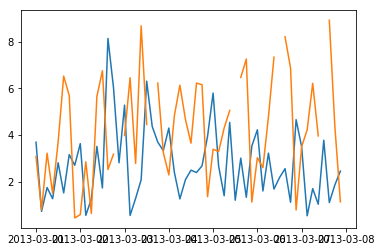

In [16]:
plt.plot(wrf1['w30'])
plt.plot(wrf1['s30'])
plt.show()

In [17]:
sod100[0:336:6]

2013-03-01 00:00:00    1.50
2013-03-01 18:00:00    7.61
2013-03-02 12:00:00    8.01
2013-03-03 06:00:00    3.44
2013-03-04 00:00:00    0.25
2013-03-04 18:00:00    8.02
2013-03-05 12:00:00    0.82
2013-03-06 06:00:00    3.66
2013-03-07 00:00:00    3.39
2013-03-07 18:00:00    6.14
Name: spd_100, dtype: float64

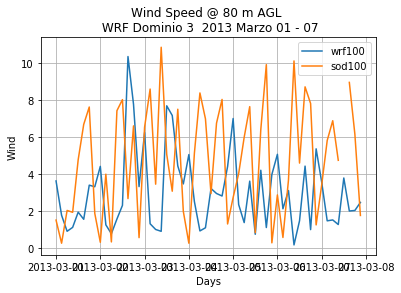

In [18]:
import pandas as pd

plt.plot(wrf100, label='wrf100')
plt.plot(sod100, label='sod100')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

dt=6

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.show()


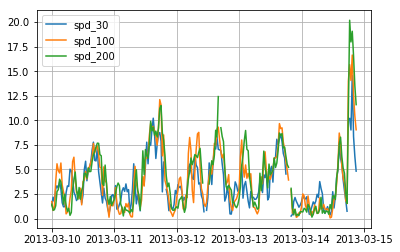

In [19]:
s30 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,0]
s100 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,7]
s200 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,17]
plt.plot(s30)
plt.plot(s100)
plt.plot(s200)
plt.legend()
plt.grid(True)
plt.savefig('sodar_20130310_30_200_wrf_d03.png', dpi=400)


In [20]:
np.cov(wrf100, wrf80)

array([[ 4.51930495,  4.156349  ],
       [ 4.156349  ,  3.84802863]])

In [26]:
np.cov(wrf100, sod100)

array([[ 4.51930495,         nan],
       [        nan,         nan]])

In [25]:
wrf100.shape

(56,)

In [24]:
sod100.shape

(56,)